In [1]:
#Import packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as DT
import sklearn.metrics as skm
from sklearn.ensemble import RandomForestClassifier as RFClass
import sys
from sklearn.metrics import confusion_matrix
import itertools

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#Load the data
projFld = "/Users/evan/Documents/Academic/Projects/Digits/"
codeFld = os.path.join(projFld, "PyCode")
fnsFld = os.path.join(codeFld,"_Functions")
outputFld = os.path.join(projFld, "Output")
rawDataFld = os.path.join(projFld, "RawData")
savedDataFld = os.path.join(projFld, "SavedData")

kdigits = pd.read_csv(os.path.join(rawDataFld, "KDigits_train.csv"))

In [3]:
# Split Train/Test
from sklearn.model_selection import train_test_split as skl_traintest_split
X = kdigits.copy().drop(columns={'label'})
Y = kdigits['label']

X_train, X_test, Y_train, Y_test = skl_traintest_split(X, Y, test_size=0.20, random_state=2019)

In [4]:
#Preprocessing transform to the input variables: Scale Data 
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

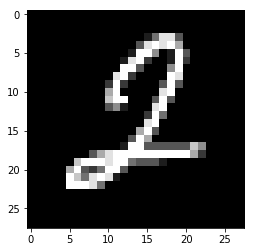

In [5]:
# Plot the data sample
plt.imshow(np.array(X_train.iloc[211], dtype='uint8').reshape((28,28)),cmap='gray')

Random forest model

In [6]:
#Build the Random forest model
model_rf = RFClass(n_estimators = 500, max_depth=6, random_state=2019, n_jobs=6)

In [7]:
#Train 10 models
y_train0 = (Y_train == 0).astype(int)
classifier0 = model_rf.fit(X_train_minmax, y_train0)
predictions0 = classifier0.predict_proba(X_test_minmax)
predictions0 = np.array(predictions0[:,1]).tolist()

y_train1 = (Y_train == 1).astype(int)
classifier1 = model_rf.fit(X_train_minmax, y_train1)
predictions1 = classifier1.predict_proba(X_test_minmax)
predictions1 = np.array(predictions1[:,1]).tolist()

y_train2 = (Y_train == 2).astype(int)
classifier2 = model_rf.fit(X_train_minmax, y_train2)
predictions2 = classifier2.predict_proba(X_test_minmax)
predictions2 = np.array(predictions2[:,1]).tolist()

y_train3 = (Y_train == 3).astype(int)
classifier3 = model_rf.fit(X_train_minmax, y_train3)
predictions3 = classifier3.predict_proba(X_test_minmax)
predictions3 = np.array(predictions3[:,1]).tolist()

y_train4 = (Y_train == 4).astype(int)
classifier4 = model_rf.fit(X_train_minmax, y_train4)
predictions4 = classifier4.predict_proba(X_test_minmax)
predictions4 = np.array(predictions4[:,1]).tolist()

y_train5 = (Y_train == 5).astype(int)
classifier5 = model_rf.fit(X_train_minmax, y_train5)
predictions5 = classifier5.predict_proba(X_test_minmax)
predictions5 = np.array(predictions5[:,1]).tolist()

y_train6 = (Y_train == 6).astype(int)
classifier6 = model_rf.fit(X_train_minmax, y_train6)
predictions6 = classifier6.predict_proba(X_test_minmax)
predictions6 = np.array(predictions6[:,1]).tolist()

y_train7 = (Y_train == 7).astype(int)
classifier7 = model_rf.fit(X_train_minmax, y_train7)
predictions7 = classifier7.predict_proba(X_test_minmax)
predictions7 = np.array(predictions7[:,1]).tolist()

y_train8 = (Y_train == 8).astype(int)
classifier8 = model_rf.fit(X_train_minmax, y_train8)
predictions8 = classifier8.predict_proba(X_test_minmax)
predictions8 = np.array(predictions8[:,1]).tolist()

y_train9 = (Y_train == 9).astype(int)
classifier9 = model_rf.fit(X_train_minmax, y_train9)
predictions9 = classifier9.predict_proba(X_test_minmax)
predictions9 = np.array(predictions9[:,1]).tolist()

In [8]:
#Combine possibilities
predictions = pd.DataFrame(
    {'0': predictions0,
     '1': predictions1,
     '2': predictions2,
     '3': predictions3,
     '4': predictions4,
     '5': predictions5,
     '6': predictions6,
     '7': predictions7,
     '8': predictions8,
     '9': predictions9
    })

In [9]:
#Select label
predictions['label'] = predictions.idxmax(axis=1)

In [10]:
#Extract labels
pre_test = predictions["label"]
y_test1 = np.array(Y_test.values).tolist()
pre_test1 = np.array(pre_test.values).tolist()
y_test1 = list(map(int, y_test1))
pre_test1 = list(map(int, pre_test1))

In [11]:
#define the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

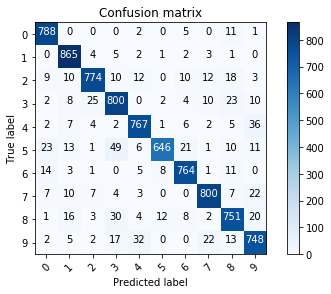

In [12]:
# Plot the confusion matrix
confusion_mtx_rf = confusion_matrix(y_test1, pre_test1)
plot_confusion_matrix(confusion_mtx_rf, classes = range(10)) 

CNN model

In [13]:
# Build the CNN model
X_train_minmax = X_train_minmax.reshape(X_train_minmax.shape[0], 28, 28, 1)
X_test_minmax = X_test_minmax.reshape(X_test_minmax.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
X_train_minmax = X_train_minmax.astype('float32')
X_test_minmax = X_test_minmax.astype('float32')
print('X_train shape:', X_train_minmax.shape)
print('Number of images in x_train', X_train_minmax.shape[0])
print('Number of images in x_test', X_test_minmax.shape[0])

X_train shape: (33600, 28, 28, 1)
Number of images in x_train 33600
Number of images in x_test 8400


In [14]:
#Train the data using CNN model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf

model_cnn = Sequential()
model_cnn.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation=tf.nn.relu))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(10,activation=tf.nn.softmax))

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(x=X_train_minmax,y=Y_train, epochs=20)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
33600/33600 [==============================] - 10s 299us/step - loss: 0.2739 - acc: 0.9175
Epoch 2/20
33600/33600 [==============================] - 10s 290us/step - loss: 0.1079 - acc: 0.9677
Epoch 3/20
33600/33600 [==============================] - 10s 292us/step - loss: 0.0704 - acc: 0.9784
Epoch 4/20
33600/33600 [==============================] - 10s 301us/step - loss: 0.0535 - acc: 0.9824
Epoch 5/20
33600/33600 [==============================] - 10s 293us/step - loss: 0.0398 - acc: 0.9870
Epoch 6/20
33600/33600 [==============================] - 10s 294us/step - loss: 0.0350 - acc: 0.9876
Epoch 7/20
33600/33600 [==============================] - 10s 292us/step - loss: 0.0293 - acc: 0.9897
Epoch 8/20
33600/33600 [===========================

In [15]:
#Evaluate the accuracy
model_cnn.evaluate(X_test_minmax, Y_test)

8400/8400 [==============================] - 1s 72us/step


[0.09597916253663892, 0.9804761904761905]

In [16]:
Y_pred = model_cnn.predict(X_test_minmax)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_test1 = np.array(Y_test.values).tolist()
Y_test1 = list(map(int, Y_test1))
Y_pred_classes1 = np.array(Y_pred_classes).tolist()

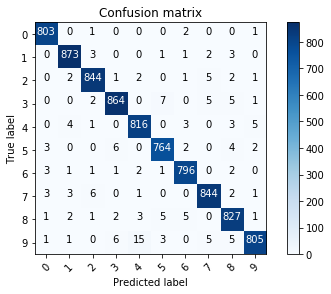

In [17]:
# Plot the confusion matrix
confusion_mtx_cnn = confusion_matrix(y_test1, Y_pred_classes1) 
plot_confusion_matrix(confusion_mtx_cnn, classes = range(10)) 